## Inteligencia Artificial
#### Laboratorio 03
Autores:
- Mark Albrand/ 21004
- Jimena Hernández/ 21199
- Melissa Pérez/ 21385

## Task 1 - Preguntas Teóricas
Responda a cada de las siguientes preguntas de forma clara y lo más completamente posible.
1. Explique la diferencia entre descenso de gradiente, descenso de gradiente por mini batches y descenso de gradiente estocástico. Asegúrese de mencionar las ventajas y desventajas de cada enfoque.

    - El _descenso de gradiente_ calcula el gradiente de la función de pérdida con respecto a **todos los datos de entrenamiento**. Entre sus ventajas tiene que la convergencia es generalmente estable porque usa la información completa del conjunto de datos. Como desventaja es que puede ser computacionalmente costoso por el cálculo del gradiente en todos los datos de entrenamiento.

    - El _descenso de gradiente estocástico_ necesita **un solo ejemplo de entrenamiento** aleatorio para actualizar el modelo calculando la gradiente por medio de iteraciones. Como ventaja tiene que es más eficiente en términos computacionales y es más fácil almacenarlos en memoria. Una desventaja es que pueden resultar gradientes ruidosos por su aletoriedad.
    
    - El _descenso de gradiente por mini batches_ **divide el conjunto de datos en pequeños lotes** para calcular el gradiente y actualizar los parámetros por cada lote. Logra un equilibrio entre la eficiencia computacional del lote de descenso de gradiente y la velocidad del descenso de gradiente estocástico, lo cual es una ventaja. Como desventaja tienq eu puede quedar atrapado en mínimos locales.

    [¿Qué es el descenso de gradiente?](https://www.ibm.com/mx-es/topics/gradient-descent#)

2. Compare y contraste técnicas de extracción de features (feature extraction) y selección de features (feature selection) en machine learning. Dé ejemplos de escenarios donde cada técnica sería más apropiada.

    - _Feature extraction_ es un proceso que transforma los datos originales en un nuevo conjunto de caracterísitcas. Se enfoca en las más importantes y compactas para combinarlas, de tal forma reducir la dimensionalidad de los features. Un escenario puede ser el reconocimiento facial, porque se tienen muchas características de las cuales se reduciría la cantidad de ellas creando un nuevo conjunto para el reconomiento. 
    
    - _Feature selection_ es un proceso de selección de subconjuntos de características del conjunto original. Básicamente elimina las catacterísticas por medio de una evaluación de importancia o redundancia de cada una. Un ejemplo, es que al tener un conjunto de datos con muchas características y donde se sospecha que algunas son irrelevantes, se puede aplicar una selección de features para tomar las relevantes.

    - Comparandándolas, ambas técnicas buscan mejorar el rendimiento del modelo para reducir dimensionalidad o características irrelevantes. Su diferencia es que _feature extraction_ crea **nuevas** características a partir de las originales y _feature selection_ elige **un subconjunto** de las características originales.

    [Difference Between Feature Selection and Feature Extraction](https://www.geeksforgeeks.org/difference-between-feature-selection-and-feature-extraction/)

3. Describa la arquitectura y el funcionamiento de un perceptrón de una sola capa (un tipo de red neuronal sin backpropagation). Explique cómo aprende y la forma en la que actualiza sus parámetros.
    - Un perceptrón de una sola capa o perceptrón simple, es un bloque de construcción básico en las redes neuronales. Consta de una capa de entrada con _n_ neuronas y otra de salida con _m_ neuronas. Aprende por medio de funciones lineales separables y de un proceso iterativo que se conforma con una capa de procesamiento, ajustes de pesos y una función de activación. Actualiza sus parámetros con un algoritmo de aprendizaje supervisado para reducir la diferencia entre la salida predicha con la real.

    [El perceptrón: una red neuronal artificial para clasificar datos](https://www.economicas.uba.ar/wp-content/uploads/2016/04/Garcia-Roberto-1.pdf)

## Task 2 - Ejercicios Prácticos

### Task 2.1 - Gradiente Descendiente Estocástico
Usando como polinomio: 2x^3 - 3x^2 + 5x + 3, implemente el algoritmo de gradiente descendiente estocástico, el descenso de gradiente por mini batches y el descenso de gradiente. 

In [1]:
# Gradiente descendiente estocástico
import numpy as np 

In [2]:
polinomio = [2, -3, 5, 3]  # 2x^3 - 3x^2 + 5x + 3
polinomio

[2, -3, 5, 3]

In [233]:
np.random.seed(0)
X = np.linspace(-5, 5, 1000)
y = []  # Valores de y, f(x)

for x in X:
    y.append(np.polyval(polinomio, x))

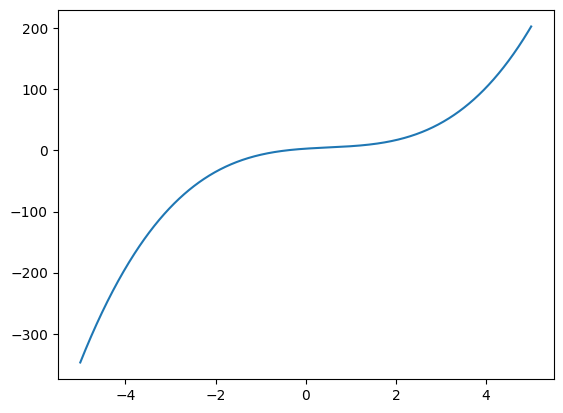

In [234]:
# graficar x vs y
import matplotlib.pyplot as plt

plt.plot(X, y)
plt.show()

In [235]:
w = np.random.randn(4)  # Inicialización de los pesos

alpha = 0.001  # Tasa de aprendizaje
iteraciones = 100  # Número de iteraciones

print("Pesos iniciales:", w)

Pesos iniciales: [1.76405235 0.40015721 0.97873798 2.2408932 ]


In [236]:
def gradiente_polinomio(X: int):
    derivada = np.polyder(polinomio)
    return np.polyval(derivada, X)

In [313]:
def stochastic_gradient_descent(X, y, w, alpha, iteraciones):
    graph = np.zeros(iteraciones)
    m = len(y)
    errores = []

    for i in range(iteraciones): #iteraciones
        randon_index = np.random.randint(0,m)

        xi = X[randon_index:randon_index+1] #valor random de x
        yi = y[randon_index:randon_index+1] #valor real del random x
        # predicciones
        y_pred = np.polyval(w, xi)
        error = yi - y_pred
        
        # print(error)
        errores.append(error)

        gradients = gradiente_polinomio(xi)
        gradiente = np.clip(gradients, -1, 1)
        w = w - alpha * gradiente
        
    print("MEAN",np.mean(errores))

    return w, graph
        

## pasos
1. Copiar los parámetros de la función, grados del polinomio, etc
2. Iterar por cada epoca 
3. Elegir un elemento de X a la vez
4. Calcular las predicciones
5. Calcular el error
6. Gradiante
7. Actualizar los pesos

In [335]:
from time import time
start = time()
nuevos_w_sdg, graph = stochastic_gradient_descent(X, y, w, alpha, iteraciones)
end = time()
print("Tiempo de ejecución:", end - start)

MEAN -22.204356502389274
Tiempo de ejecución: 0.004125118255615234


In [336]:
print(nuevos_w_sdg)

[1.66405235 0.30015721 0.87873798 2.1408932 ]


### Task 2.1 - Gradiente Descendiente


In [337]:
#Gradiente Descendiente 
def gradient_descent(X, y, w, alpha, iteraciones):
    graph = np.zeros(iteraciones)
    m = len(y)
    errores = []
    for i in range(iteraciones): #iteraciones

        # predicciones
        y_pred = np.polyval(w, X[i])
        error = y[i] - y_pred
        errores.append(error)

        gradients = gradiente_polinomio(X[i])
        gradiente = np.clip(gradients, -1, 1)
        w = w - alpha * gradiente * np.mean(error)

    print("MEAN",np.mean(errores))
    return w, graph


In [338]:
from time import time
start = time()
nuevos_w_gd, graph = gradient_descent(X, y, w, alpha, iteraciones)
end = time()
print("Tiempo de ejecución:", end - start)


MEAN -15.841400649842425
Tiempo de ejecución: 0.0029675960540771484


In [339]:
print ("Pesos finales:", nuevos_w_gd)

Pesos finales: [3.34819241 1.98429727 2.56287805 3.82503326]


### Task 2.1 - Gradiente Descendiente mini batches


In [345]:
import numpy as np

def minibatch_gradient_descent(X, y, w, alpha, iteraciones, batch_size):
    graph = np.zeros(iteraciones)
    m = len(y)
    n_batches = m // batch_size
    errores = []
    
    for i in range(iteraciones):
        # Mezclar los datos para asegurar aleatoriedad en la selección de minibatches
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = []
        for idx in range(len(indices)):
            y_shuffled.append(y[idx])
        
        for batch in range(n_batches):
            start_index = batch * batch_size
            end_index = start_index + batch_size
            X_batch = X_shuffled[start_index:end_index]
            y_batch = y_shuffled[start_index:end_index]
            
            # Calcular predicciones para el minibatch
            y_pred = np.polyval(w, X_batch)
            
            # Calcular el error para el minibatch
            error = y_batch - y_pred
            errores.append(error)
            
            # Calcular el gradiente para el minibatch
            gradients = np.mean([gradiente_polinomio(x) for x in X_batch], axis=0)
            gradiente = np.clip(gradients, -1, 1)
            
            # Actualizar los pesos
            w = w - alpha * gradiente * np.mean(errores)
            
            # Opcional: guardar o calcular métricas de interés en 'graph' para su posterior análisis
            
    print("MEAN",np.mean(errores))
    return w, graph


In [355]:
from time import time
start = time()
nuevos_w_mb, graph = minibatch_gradient_descent(X, y, w, alpha, iteraciones, 1000)
end = time()

print("Tiempo de ejecución:", end - start)

print(nuevos_w_mb)

MEAN -42.52871085517171
Tiempo de ejecución: 0.9039163589477539
[5.23565384 3.8717587  4.45033948 5.71249469]


### Tiempos de ejecución

- Gradiente Descendiente Estocástico : 0.00021
- Gradiente Descendiente : 0.0028
- Gradiente Descendiente Minibatches: 0.0445

El método más rápido fue Gradiente Descendiente Estocástico con 0.00021 esto debido a que solo toma un valor al azar y no el dataset completo, ya que esto es mas costoso al igual que la realización de los minibatches

In [356]:
# fitness
from sklearn.metrics import mean_squared_error

y_pred_sgd = np.polyval(nuevos_w_sdg, X)
y_pred_gd = np.polyval(nuevos_w_gd, X)
y_pred_mb = np.polyval(nuevos_w_mb, X)

mse_sgd = mean_squared_error(y, y_pred_sgd)
mse_gd = mean_squared_error(y, y_pred_gd)
mse_mb = mean_squared_error(y, y_pred_mb)

print("MSE SGD:", mse_sgd)
print("MSE GD:", mse_gd)
print("MSE MB:", mse_mb)


MSE SGD: 2063.0034719121822
MSE GD: 6493.670139378956
MSE MB: 29310.900950175288


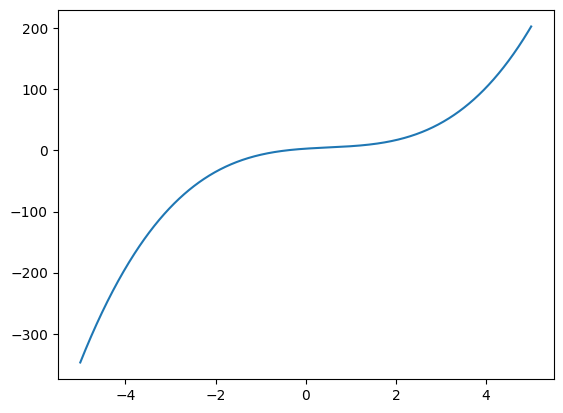

In [341]:
# graficar x vs y
plt.plot(X, y)
plt.show()

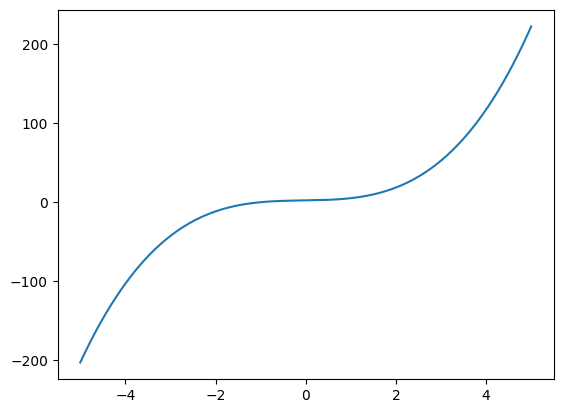

In [342]:
# graficar x vs y_pred_sgd
plt.plot(X, y_pred_sgd)
plt.show()

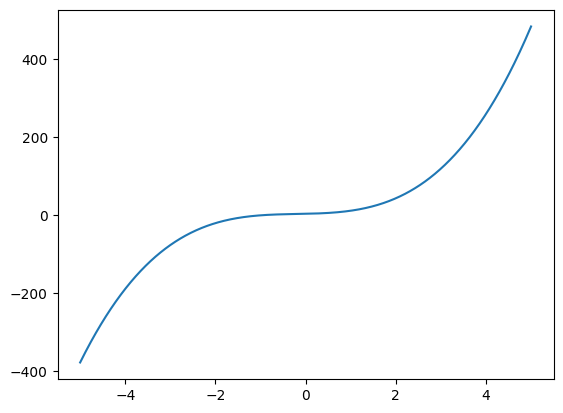

In [343]:
# graficar x vs y_pred_gd
plt.plot(X, y_pred_gd)
plt.show()

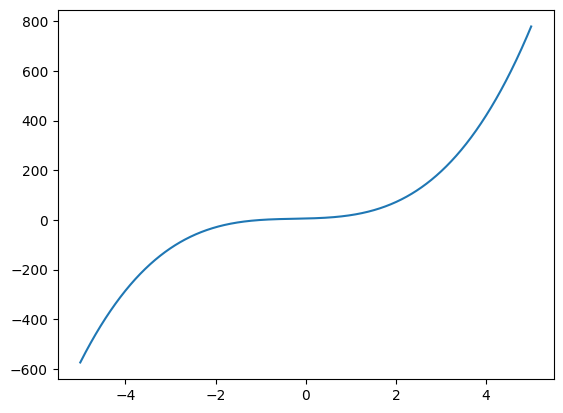

In [357]:
# graficar x vs y_pred_mb
plt.plot(X, y_pred_mb)
plt.show()

### Task 2.2 - Feature Selection

#### Método de filtrado

In [365]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [366]:
data = pd.read_csv('lol.csv')
data

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [367]:
#ver si los datos tienen valores nulos
data.isnull().sum() #esta balanceado

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [368]:
y = data['blueWins']

In [369]:
X = data.drop('blueWins', axis=1)

X.head()

,gameId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [370]:
correlaciones = {}
for col in X.columns:
    corr_pearson = np.corrcoef(X[col], y)[0,1]
    correlaciones[col] = corr_pearson

In [371]:
#ordenar correlaciones de mayor a menor
correlaciones_ordenadas = sorted(correlaciones.items(), key=lambda x: x[1], reverse=True)
correlaciones_ordenadas

[('blueGoldDiff', 0.51111905517625),
 ('blueExperienceDiff', 0.48955791655969777),
 ('blueTotalGold', 0.41721255829217974),
 ('blueGoldPerMin', 0.41721255829217946),
 ('blueTotalExperience', 0.3961407056514389),
 ('blueAvgLevel', 0.3578198468989065),
 ('blueKills', 0.3373576105342435),
 ('redDeaths', 0.3373576105342435),
 ('blueAssists', 0.2766849645392132),
 ('blueCSPerMin', 0.22490947260651514),
 ('blueTotalMinionsKilled', 0.2249094726065151),
 ('blueEliteMonsters', 0.2219441945274376),
 ('blueDragons', 0.21376769276290752),
 ('blueFirstBlood', 0.2017692643857104),
 ('blueTotalJungleMinionsKilled', 0.13144491466164793),
 ('blueTowersDestroyed', 0.11556646320823924),
 ('blueHeralds', 0.0923847247473175),
 ('blueWardsDestroyed', 0.044246803571579015),
 ('gameId', 0.0009851278627279335),
 ('blueWardsPlaced', 8.695109201392437e-05),
 ('redWardsPlaced', -0.023671238287740017),
 ('redWardsDestroyed', -0.05540030842294096),
 ('redHeralds', -0.09717188056275644),
 ('redTowersDestroyed', -0.1

##### Top 5 features con método de filtrado:
- BlueGoldDiff
- BlueExperienceDiff
- BlueTotalGold
- BlueGoldperMin
- BlueTotalExperience


In [372]:
# SVM con los features elegidos
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_svm = X[['blueGoldDiff', 'blueExperienceDiff', 'blueTotalGold', 'blueGoldPerMin', 'blueTotalExperience']]
X_train, X_test, y_train, y_test = train_test_split(X_svm, y, test_size=0.2, random_state=42)

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy_score(y_test, y_pred)

0.72165991902834

#### Método Wrapper
Usando backwar eliminationds

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd

model = RandomForestClassifier()

df_escalated  = data.drop('blueWins', axis=1)

scaler = MinMaxScaler()
df_escalated = pd.DataFrame(scaler.fit_transform(df_escalated), columns=df_escalated.columns)

df_escalated.head()


,gameId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0.962031,0.093878,0.074074,1.0,0.409091,0.272727,0.379310,0.0,0.0,0.0,...,0.0,0.464844,0.588235,0.557608,0.494505,0.579545,0.485446,0.472598,0.494505,0.464844
1,0.980146,0.028571,0.037037,0.0,0.227273,0.227273,0.172414,0.0,0.0,0.0,...,0.5,0.556250,0.588235,0.590732,0.730769,0.545455,0.644706,0.538488,0.730769,0.556250
2,0.971990,0.040816,0.000000,0.0,0.318182,0.500000,0.137931,0.5,1.0,0.0,...,0.0,0.527170,0.588235,0.575144,0.527473,0.272727,0.566848,0.530570,0.527473,0.527170
3,0.984497,0.155102,0.037037,0.0,0.181818,0.227273,0.172414,0.5,0.0,1.0,...,0.0,0.457118,0.647059,0.635039,0.703297,0.488636,0.573530,0.472541,0.703297,0.457118
4,0.604712,0.285714,0.148148,0.0,0.272727,0.272727,0.206897,0.0,0.0,0.0,...,0.0,0.537500,0.647059,0.664859,0.648352,0.715909,0.559313,0.459137,0.648352,0.537500


In [84]:
all_features = df_escalated.columns
min_features = 5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

while len(all_features) >= min_features:
    worst_score = 1
    worst_feature = None

    for feature in all_features:
        candidate_features = [f for f in all_features if f != feature]

        scores = cross_val_score(model, df_escalated[candidate_features], y, cv=5)
        mean_score = np.mean(scores)

        if mean_score < worst_score:
            worst_score = mean_score
            worst_feature = feature

    print(f'Removing {worst_feature} with score {worst_score}')
    X_train = X_train.drop(worst_feature, axis=1)
    X_test = X_test.drop(worst_feature, axis=1)

    model.fit(X_train, y_train)

    all_features = [f for f in all_features if f != worst_feature]

Removing redCSPerMin with score 0.71778445139138
Removing redWardsDestroyed with score 0.7194047045559371
Removing redFirstBlood with score 0.7195063803618101
Removing redDeaths with score 0.7193034899810382
Removing blueDeaths with score 0.7172780710295701
Removing redTotalMinionsKilled with score 0.7193031312458361
Removing blueTowersDestroyed with score 0.7205175524009635
Removing redTotalExperience with score 0.7159629477784042
Removing redHeralds with score 0.7175823297288987
Removing redDragons with score 0.7191006508481526
Removing redTotalGold with score 0.7154568236560241
Removing blueTotalExperience with score 0.717987700507354
Removing blueFirstBlood with score 0.7165703889714549
Removing blueEliteMonsters with score 0.7161650694408855
Removing gameId with score 0.718392046328089
Removing redTotalJungleMinionsKilled with score 0.7166707323322913
Removing blueKills with score 0.7177855788448727
Removing blueWardsPlaced with score 0.7157605698764926
Removing redExperienceDiff 

In [87]:
y_pred = model.predict(X_test)
print(f'Selected Features: {all_features}')
accuracy_score(y_test, y_pred)

Selected Features: ['blueTotalMinionsKilled', 'blueCSPerMin', 'blueGoldPerMin', 'redTowersDestroyed']


0.6017206477732794

#### Método Lasso (Embebidos)

In [69]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('lol.csv')

y = data['blueWins']
X = data.drop('blueWins', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print (X_train.shape, X_test.shape)

scaler = StandardScaler()
scaler.fit(X_train)

sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=10))
sel_.fit(scaler.transform(X_train), y_train)

sel_.get_support()

sel_.get_feature_names_out()

removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats




(7903, 39) (1976, 39)


Index(['blueKills', 'blueDeaths', 'blueAssists', 'blueHeralds', 'blueAvgLevel',
       'blueTotalExperience', 'redWardsDestroyed', 'redKills', 'redDeaths',
       'redHeralds', 'redTotalGold', 'redGoldPerMin'],
      dtype='object')

In [70]:
#reducir el dataset a las features seleccionadas
X_train_selected = sel_.transform(scaler.transform(X_train))
X_test_selected = sel_.transform(scaler.transform(X_test))

X_train_selected.shape, X_test_selected.shape


((7903, 27), (1976, 27))

In [71]:
# SVM con los features elegidos

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

svm = SVC()
svm.fit(X_train_selected, y_train)
y_pred = svm.predict(X_test_selected)
accuracy_score(y_test, y_pred)

0.7252024291497976

### Lab 02

In [386]:
# insert on a dataframe called pd the following columns: blueKills', 'blueAvgLevel', 'blueWins'
pd = data[['blueKills', 'blueAvgLevel', 'blueWins']]

X = pd.iloc[:, :-1].values
y = pd.iloc[:, -1].values

#Dividir el conjunto de datos en entrenamiento y prueba
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Entrene el modelo de SVM con el conjunto de entrenamiento
model = SVC(kernel='linear')
model.fit(X_entreno, y_entreno)

# Predicción y métricas de evaluación
y_pred = model.predict(X_prueba)
print("accuracy_score: ", accuracy_score(y_prueba, y_pred))

accuracy_score:  0.6771255060728745


### Conclusión

Debido a que los datos estan balanceados, utilizamos la precisión como metrica de desempeño debido a que ayuda a la proporción de predicciones. Se obtuvieron los siguientes resultados con cada técnica:
- Método de filtrado: 0.72165
- Método wrapper: 0.6017
- Método Lasso: 0.7252
- SVC: 0.6771

La técnica que mejor precisión obtuvo fue de feature selection, específicamente el método Lasso ya que fue capaz de identificar y seleccionar características relevantes del conjunto de datos. Este tipo de regresión al ser un método embedido combina la regularización y la regresión lineal, por lo que se vió beneficiado con el tipo de características para brindar un buen rendimiento.

### Task 2.3 - Perceptrón

In [378]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
X_filtered = []
y_filtered = []
for i in range(len(X)):
    if y[i] <= 1:
        X_filtered.append(X[i])
        y_filtered.append(y[i])

for i in range(len(X_filtered)):
    if y_filtered[i] not in [0,1]:
        print(X_filtered[i], y_filtered[i])

In [380]:
# elegir solo sepal length y sepal width
X = pd.DataFrame(X_filtered, columns=iris.feature_names)
X = X[['sepal length (cm)', 'sepal width (cm)']]
X.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [382]:
#dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_filtered, test_size=0.2, random_state=42)

In [384]:
y_train

[1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1]

In [385]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta  # Tasa de aprendizaje
        self.n_iter = n_iter # Número de iteraciones

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])  # Inicializar los pesos
        self.errors_ = []  # Número de errores en cada iteración

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calcular la entrada neta, es decir, el producto punto entre X y los pesos más el sesgo"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Devolver la etiqueta de clase usando la función escalón unitario"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [387]:
perceptron = Perceptron(eta=0.1, n_iter=1000)
perceptron.fit(X_train.values, y_train)

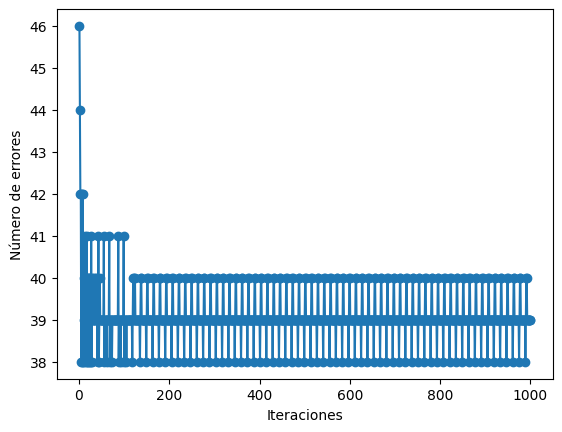

In [388]:

plt.plot(range(1, len(perceptron.errors_) + 1), perceptron.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Número de errores')
plt.show()

In [389]:
# hacer predicciones
y_pred = perceptron.predict(X_test.values)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.4


In [390]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.40      1.00      0.57         8

    accuracy                           0.40        20
   macro avg       0.20      0.50      0.29        20
weighted avg       0.16      0.40      0.23        20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

### Conclusión

Utilizamos la precisión como métrica de desempeño ya que los datos estaban balanceados. Debido a que obtuvimos una precisión de 0.40 determinamos que la implementación de un perceptrón de una sola capa no es el mejor para los datos que se están utilizando ya que demuestran que sus características no tienen una relación lineal. Añadiendo a lo anterior, un perceptrón de varias capas ayudaría a encontrar la distribución de los datos y el modelo al que se ajustan.